In [1]:
title = "ogs@jupyter-lab: Saturated Variable-Density Flow and Mass Transport (Elder)"
variables = ['pressure','Si']
variable = "pressure"

# Saturared Variable-Density Flow and Mass Transport (Elder)

**Running ogs using [ogs6py](https://github.com/joergbuchwald/ogs6py)**

In [2]:
import multiprocessing
from ogs6py import ogs
#start ogs in background
print("===============")
print(">>> start ogs <<<")
# OGS_PATH = "/path/to/directory/of/either/ogs.exe/or/singularity"
# if ogs is run from a singularity container, the OGS_PATH should
# direct to location of singularity
OGS_PATH = "/usr/bin/"
# CONTAINER_PATH = "path/to/.sif"
# only required, if ogs is run from a container
CONTAINER_PATH = "/home/bathmann/Documents/UFZ/code/dgr/container/images/ogs-dgr_latest.sif"
# PROJECT_FILE = "relative/or/absolute/path/to/project/file"
PROJECT_FILE = "elder-python.prj"

# model creation using ogs6py
model = ogs.OGS(PROJECT_FILE=PROJECT_FILE)
# listing model as process for parallel processing
ogs_process = multiprocessing.Process(
    target=model.run_model,
    kwargs={"path":OGS_PATH, "container_path":CONTAINER_PATH,"LOGFILE":"example.log"})
# start of ogs in background
ogs_process.start()
print(">>> ogs is running in background <<<")

>>> start ogs <<<
>>> ogs is running in background <<<


**Extracting results using [VTUInterface](https://github.com/joergbuchwald/VTUinterface)**

***Definition of required methods***

In [3]:
import vtuIO
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import os
import re

# Data extraction
def triangulate(vtu_file):
    m_plot = vtuIO.VTUIO(vtu_file, dim=3)
    triang = tri.Triangulation(m_plot.points[:,0],m_plot.points[:,2])
    si_plot = m_plot.get_point_field("Si")
    pressure_plot = m_plot.get_point_field("pressure")
    return triang, [si_plot, pressure_plot]

# Data to figure
def update_figure(triang, data):
    for ax_i, data_i in zip(ax, data):
        ax_i.clear()
        contour_i = ax_i.tricontourf(triang, data_i)
        plt.colorbar(contour_i, ax=ax_i)

# Update available simulation results
def explore_and_sort_files():
    files = os.listdir()
    times = {}
    for file in files[::-1]:
        if "elder_python_ts" in file:
            [timestep, time_i] = [float(s) for s in re.findall(r'-?\d+\.?\d*', file)]
            times[timestep] = time_i
    timesteps = sorted(times)
    return times, timesteps

# Update filename
def filename_update(timestep):
    global vtu_file
    vtu_file = "elder_python_ts_" 
    vtu_file += str(int(timestep))
    vtu_file += "_t_"
    vtu_file += "%2.6f"%times[timestep]
    vtu_file += str(".vtu")
    


***First visualization of initial conditions***

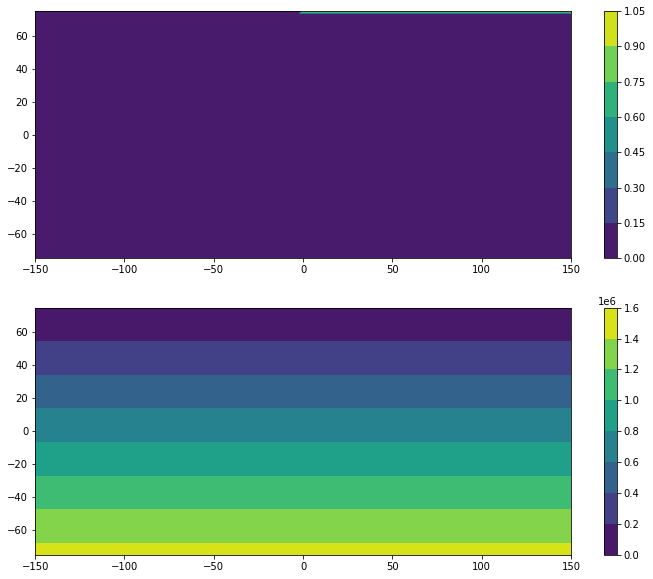

In [7]:
# Plot of initial conditions at timestep ts = 0
fig, ax = plt.subplots(nrows=2, figsize=(12,10), num=1)
vtu_file = "elder_python_ts_0_t_0.000000.vtu"
triang, data = triangulate(vtu_file)
update_figure(triang, data)


***List of results***

In [8]:
# This line can be called to list the available simulation results
# With progressing time, the list will enlarge
times, timesteps = explore_and_sort_files()
for step in timesteps: print(int(step))

0
20


***Selection of results to be visualized***

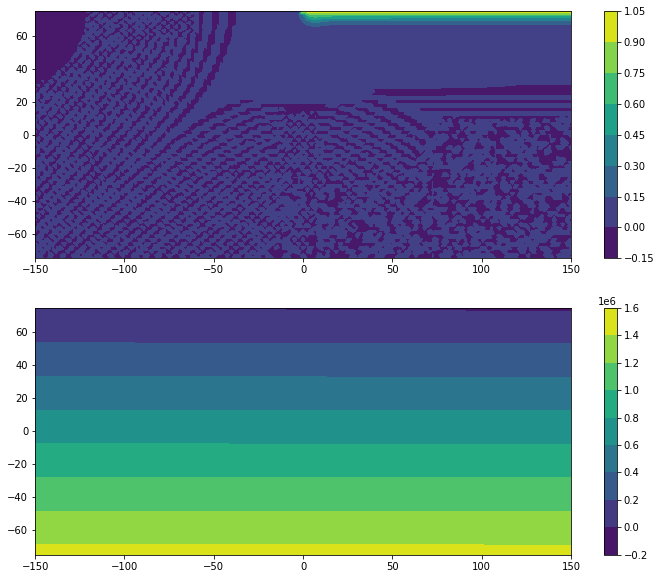

In [6]:
# Choose one of the listed timesteps to be displayed
timestep = 20

# Show data from choosen timestep
fig, ax = plt.subplots(nrows=2, figsize=(12,10), num=1)
filename_update(timestep)
triang, data = triangulate(vtu_file)
update_figure(triang, data)

**Results have been shown using [matplotlib](https://matplotlib.org/)**

**OGS links**
- description: https://www.opengeosys.org/docs/benchmarks/hydro-component/elder/
- project file: elder-python.prj
- notebook compilation by OK (https://github.com/OlafKolditz/ogs-jupyter-lab)

**Credits**
- Marc Walther for this benchmark set up
- Jörg Buchwald for ogs6py and VTUInterface (JOSS review pending) https://joss.theoj.org/papers/6ddcac13634c6373e6e808952fdf4abc
